In [1]:
# Check identifiability on longitudinal UKB age sex

import pickle

demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/UKB/'

demo = pickle.load(open(f'{demodir}/demographics.pkl', 'rb'))

print(demo.keys())

dict_keys(['f_22001_0_0', 'f_21003_3_0', 'f_21003_2_0', 'f_21000_0_0', 'CaAfCarDiff', 'CaIndDiff', 'CaChiDiff', 'f_21000_0_0_comb', 'longitudinal', '22438-0.0', '22828-0.0', '26201-0.0', '26202-0.0', '26203-0.0', '26204-0.0', '26205-0.0', '26206-0.0', '26207-0.0', '26208-0.0', '26209-0.0', '26210-0.0', '26211-0.0', '26212-0.0', '26213-0.0', '26214-0.0', '26215-0.0', '26216-0.0', '26217-0.0', '26218-0.0', '26219-0.0', '26220-0.0', '26221-0.0', '26222-0.0', '26223-0.0', '26224-0.0', '26225-0.0', '26226-0.0', '26227-0.0', '26228-0.0', '26229-0.0', '26231-0.0', '26232-0.0', '26233-0.0', '26234-0.0', '26235-0.0', '26236-0.0', '26237-0.0', '26238-0.0', '26239-0.0', '26240-0.0', '26241-0.0', '26242-0.0', '26243-0.0', '26244-0.0', '26245-0.0', '26246-0.0', '26247-0.0', '26248-0.0', '26249-0.0', '26250-0.0', '26251-0.0', '26252-0.0', '26253-0.0', '26254-0.0', '26255-0.0', '26256-0.0', '26257-0.0', '26258-0.0', '26259-0.0', '26260-0.0', '26261-0.0', '26262-0.0', '26263-0.0', '26264-0.0', '26265-

In [17]:
# Load all data

import numpy as np

fc2 = []
age2 = []

for i,sub in enumerate(demo['f_21003_2_0']):
    try:
        p0 = np.load(f'{demodir}/fc/{sub}_task-20227-2_fc.npy')
        a = demo['f_21003_2_0'][sub]
    except:
        continue
    fc2.append(p0)
    age2.append(a)
    if i%1000 == 0:
        print(f'Done {i}')
    
fc2 = np.stack(fc2)
age2 = np.array(age2)

print(len(fc2), len(age2))

40623 40623


In [5]:
# Load longitudinal data and age

import numpy as np

scan2 = []
scan3 = []
sex = []
age = []

for sub in demo['longitudinal']:
    try:
        p2 = np.load(f'{demodir}/fc/{sub}_task-20227-2_fc.npy')
        p3 = np.load(f'{demodir}/fc/{sub}_task-20227-3_fc.npy')
        s = demo['f_22001_0_0'][sub]
        a = demo['f_21003_2_0'][sub]
    except KeyError:
        continue
    scan2.append(p2)
    scan3.append(p3)
    sex.append(s)
    age.append(a)
    
scan2 = np.stack(scan2)
scan3 = np.stack(scan3)
sex = np.array(sex)
age = np.array(age)

print(len(scan2), len(scan3), len(sex), len(age))

2658 2658 2658 2658


In [14]:
# Cheating

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

def rmse(a, b):
    return np.mean((a-b)**2)**0.5

errs = []
ws = []

for i in range(20):
    idcs = np.random.permutation(len(scan2))
    tridcs, tidcs = train_test_split(idcs, train_size=50)
    
    xtr = scan2[tridcs]
    xt = scan3[tridcs]
    ytr = age[tridcs]
    yt = age[tridcs]
    
    reg = Ridge(alpha=10).fit(xtr, ytr)
    ws.append(reg.coef_.squeeze())
    yhat = reg.predict(xt)
    loss = rmse(yhat, yt)
    errs.append(loss)
    print(loss)

ws = np.stack(ws)

print(np.mean(errs), np.std(errs))
print(ws.shape)

5.1345858097297885
4.440231428105601
4.128749014610468
4.5726732991894545
4.501118667690287
5.197260582849298
4.687821702944472
5.325818552879702
4.981708178670069
4.894101908683162
5.519455033720936
5.4954147572792
4.863107843261109
5.361705143764325
5.287874850401254
5.485234945092636
4.498900586930549
4.583066333581605
5.892330811133589
3.9373044602433573
4.939423195538042 0.5018157328174637
(20, 34716)


In [22]:
# Not cheating

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

def rmse(a, b):
    return np.mean((a-b)**2)**0.5

errs = []
ws2 = []

for i in range(20):
    xtr, xt, ytr, yt = train_test_split(scan2, age, train_size=1350)
    
    reg = Ridge(alpha=1000).fit(xtr, ytr)
    ws2.append(reg.coef_.squeeze())
    yhat = reg.predict(xt)
    loss = rmse(yhat, yt)
    errs.append(loss)
    print(loss)

ws2 = np.stack(ws2)

print(np.mean(errs), np.std(errs))
print(ws.shape)

5.980114120225886
5.988169133367737
5.899524633521932
6.033369184907535
5.9700768545694025
6.090583279593408
5.953316760630494
5.961023300710588
6.1528474350580105
5.925155794999699
5.884840185399983
6.099385636403743
6.10385362852271
5.920984283444024
5.917147883047918
5.792998389822093
5.969468455483901
5.990024352252664
6.066204051901313
6.054383652699187
5.987673550828111 0.08623321662838991
(20, 34716)


In [15]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


/tmp/ipykernel_155912/1848434052.py:53: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


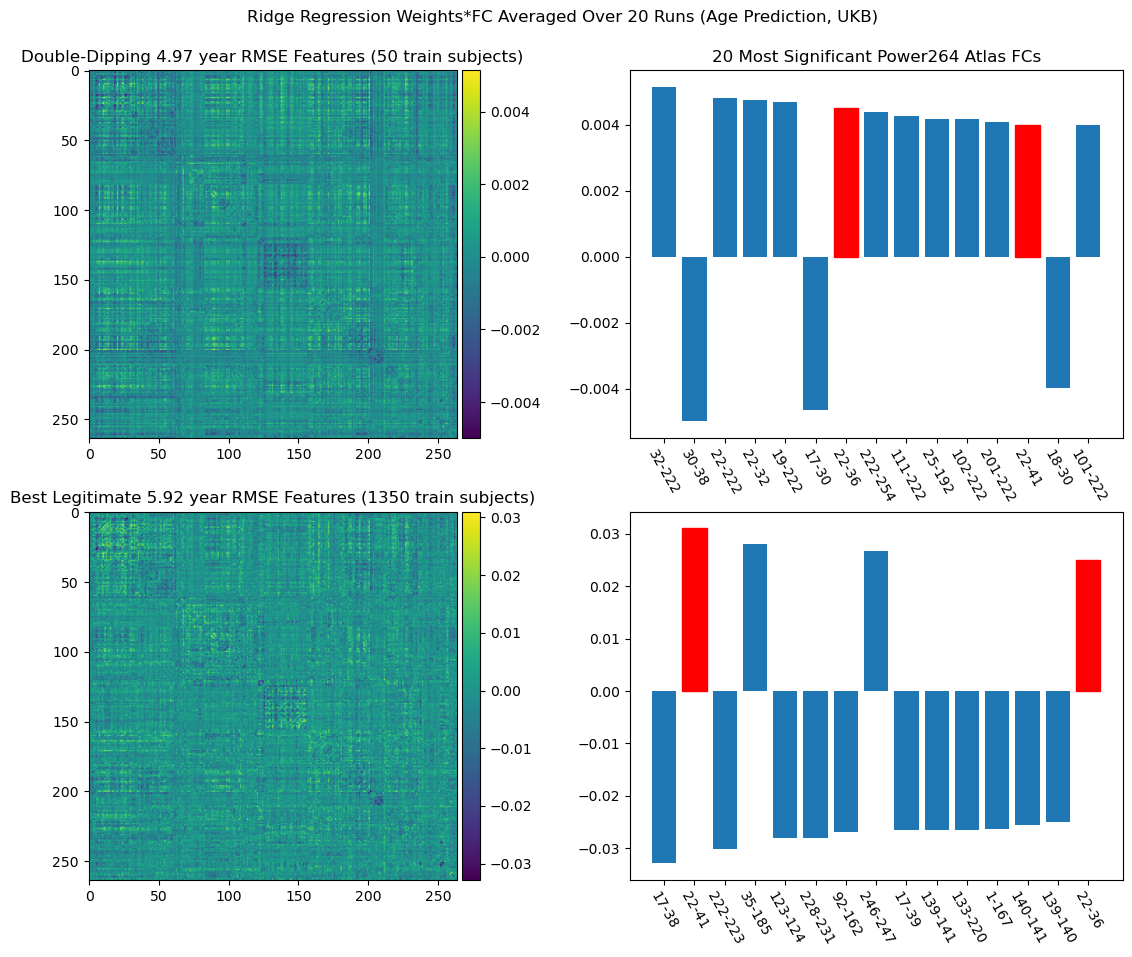

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

wmu = np.mean(ws, axis=0)
wmu2 = np.mean(ws2, axis=0)
# fcmu = np.mean(np.concatenate([rest, epr], axis=0), axis=0)
fcmu = np.mean(scan2, axis=0)

feat = wmu*fcmu
feat2 = wmu2*fcmu

a,b = np.triu_indices(264,1)

N = 15

idcs = np.argsort(np.abs(feat))[::-1]
idcs2 = np.argsort(np.abs(feat2))[::-1]

fig, ax = plt.subplots(2,2,figsize=(14,10))

im = ax[0,0].imshow(remap(vec2mat(feat)))
ax[0,0].set_title('Double-Dipping 4.97 year RMSE Features (50 train subjects)')

divider = make_axes_locatable(ax[0,0])
cax = divider.append_axes('right', size='5%', pad=0.05)

fig.colorbar(im, cax=cax, orientation='vertical')

blist = ax[0,1].bar([f'{a[idx]}-{b[idx]}' for idx in idcs[:N]], feat[idcs[:N]])
ax[0,1].tick_params(axis='x', labelrotation=-60)

blist[6].set_color('r')
blist[12].set_color('r')

ax[0,1].set_title('20 Most Significant Power264 Atlas FCs')

im = ax[1,0].imshow(remap(vec2mat(feat2)))
ax[1,0].set_title('Best Legitimate 5.92 year RMSE Features (1350 train subjects)')

divider = make_axes_locatable(ax[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)

fig.colorbar(im, cax=cax, orientation='vertical')

blist = ax[1,1].bar([f'{a[idx]}-{b[idx]}' for idx in idcs2[:N]], feat2[idcs2[:N]])
ax[1,1].tick_params(axis='x', labelrotation=-60)

blist[1].set_color('r')
blist[14].set_color('r')

fig.suptitle('Ridge Regression Weights*FC Averaged Over 20 Runs (Age Prediction, UKB)')
fig.subplots_adjust(top=0.92)
fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/Identifiability/diff_feat_ukb_age.pdf')

In [28]:
np.intersect1d(idcs[:15], idcs2[:15])

array([5568, 5573])